In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Read in my projections for 2024
projections2024 = pd.read_csv("../pitching/projections2024.csv", index_col=["PlayerId"])
projections2024.head() 

,Season,pred_IP,pred_SOperIP,pred_BBperIP,pred_HperIP,pred_HBPperIP,pred_HRperIP
PlayerId,,,,,,,
2036,2024,100.403604,1.025530,0.235958,0.926092,0.026482,0.136111
2520,2024,141.213605,1.053602,0.338776,0.957939,0.048318,0.153695
3137,2024,149.041893,1.223670,0.244545,0.823117,0.046566,0.144209
4676,2024,119.193440,1.158940,0.405150,0.878174,0.080593,0.142263
6632,2024,70.565817,0.914658,0.388232,1.027637,0.047938,0.145456


In [46]:
# Read in Steamer projections for 2024
steamer = pd.read_csv("../data/pitching/fg-steamer600-pitching.csv", index_col=["PlayerId"])
steamer[["IP", "SO", "BB", "H", "HBP", "HR"]].head()

,IP,SO,BB,H,HBP,HR
PlayerId,,,,,,
27498,184.801605,257.093903,62.133801,138.491394,7.8742,21.170050
10310,197.442093,198.574799,47.654400,179.694107,9.3533,23.934370
14107,193.297607,220.935104,51.723099,167.194397,5.1195,23.732649
16149,195.106705,200.482803,44.563202,182.909607,6.8162,27.748508
17085,193.265900,213.517899,53.560001,171.682404,8.8140,22.118208


In [47]:
steamer["SOperIP"] = steamer["SO"] / steamer["IP"]
steamer["BBperIP"] = steamer["BB"] / steamer["IP"]
steamer["HperIP"] = steamer["H"] / steamer["IP"]
steamer["HBPperIP"] = steamer["HBP"] / steamer["IP"]
steamer["HRperIP"] = steamer["HR"] / steamer["IP"]

steamer[["IP", "SOperIP", "BBperIP", "HperIP", "HBPperIP", "HRperIP"]]

,IP,SOperIP,BBperIP,HperIP,HBPperIP,HRperIP
PlayerId,,,,,,
27498,184.801605,1.391189,0.336219,0.749406,0.042609,0.114556
10310,197.442093,1.005737,0.241359,0.910110,0.047372,0.121222
14107,193.297607,1.142979,0.267583,0.864958,0.026485,0.122778
16149,195.106705,1.027555,0.228404,0.937485,0.034936,0.142222
17085,193.265900,1.104788,0.277131,0.888322,0.045606,0.114444
...,...,...,...,...,...,...
sa3016025,1.000000,0.498400,0.975400,1.192400,0.054500,0.193444
sa3015462,1.000000,0.474900,0.935900,1.204900,0.057100,0.196444
sa3011441,1.000000,0.474100,0.918000,1.210800,0.055800,0.200444


In [48]:
# Get actual data for comparison
actuals = pd.read_csv("../data/pitching/fg-pitching-standard+age.csv", index_col=["PlayerId", "Season"])
actuals["SOperIP"] = actuals["SO"] / actuals["IP"]
actuals["HperIP"] = actuals["H"] / actuals["IP"]
actuals["BBperIP"] = actuals["BB"] / actuals["IP"]
actuals["HBPperIP"] = actuals["HBP"] / actuals["IP"]
actuals["HRperIP"] = actuals["HR"] / actuals["IP"]

In [49]:
# Drop instances where the PlayerId is not an integer
steamer = steamer[~steamer.index.str.startswith(('sa'))]

# Set index type to integer
steamer.index = steamer.index.astype(int)

In [50]:
steamer = steamer[["IP", "SOperIP", "BBperIP", "HperIP", "HBPperIP", "HRperIP", "Name"]]

steamer.rename(columns={"IP":"steamer_IP", "SOperIP":"steamer_SOperIP", "BBperIP":"steamer_BBperIP", "HperIP":"steamer_HperIP", "HBPperIP":"steamer_HBPperIP", "HRperIP":"steamer_HRperIP"}, inplace=True)

steamer

,steamer_IP,steamer_SOperIP,steamer_BBperIP,steamer_HperIP,steamer_HBPperIP,steamer_HRperIP,Name
PlayerId,,,,,,,
27498,184.801605,1.391189,0.336219,0.749406,0.042609,0.114556,Spencer Strider
10310,197.442093,1.005737,0.241359,0.910110,0.047372,0.121222,Zack Wheeler
14107,193.297607,1.142979,0.267583,0.864958,0.026485,0.122778,Kevin Gausman
16149,195.106705,1.027555,0.228404,0.937485,0.034936,0.142222,Aaron Nola
17085,193.265900,1.104788,0.277131,0.888322,0.045606,0.114444,Pablo López
...,...,...,...,...,...,...,...
24203,1.000000,0.690100,0.728000,1.072200,0.059600,0.139778,Luis Peralta
26944,1.000000,0.636700,0.599800,1.158100,0.050600,0.197444,Edgardo Henriquez
20277,9.005000,0.902565,0.471027,0.986752,0.049317,0.180000,Cory Abbott


In [51]:
actuals2024 = actuals[actuals.index.get_level_values(1) == 2024]
actuals2024 = actuals2024[["IP", "SOperIP", "BBperIP", "HperIP", "HBPperIP", "HRperIP"]]

actuals2024.rename(columns={"IP":"actual_IP", "SOperIP":"actual_SOperIP", "BBperIP":"actual_BBperIP", "HperIP":"actual_HperIP", "HBPperIP":"actual_HBPperIP", "HRperIP":"actual_HRperIP" }, inplace=True)

actuals2024

,,actual_IP,actual_SOperIP,actual_BBperIP,actual_HperIP,actual_HBPperIP,actual_HRperIP
PlayerId,Season,,,,,,
22267,2024,192.0,1.187500,0.182292,0.739583,0.046875,0.078125
10603,2024,177.2,1.269752,0.220090,0.795711,0.045147,0.050790
10310,2024,200.0,1.120000,0.260000,0.695000,0.040000,0.100000
18525,2024,189.1,1.184558,0.343733,0.724484,0.010576,0.095188
21846,2024,186.1,1.198280,0.360021,0.784524,0.032241,0.080602
...,...,...,...,...,...,...,...
19225,2024,23.2,0.560345,0.560345,1.120690,0.043103,0.172414
12272,2024,26.2,0.458015,0.305344,1.259542,0.038168,0.152672
20045,2024,21.0,0.571429,0.095238,0.428571,0.095238,0.000000


In [52]:
steamer_projections2024 = steamer.merge(projections2024, left_index=True, right_index=True).merge(actuals2024, left_index=True, right_index=True)

In [53]:
data = steamer_projections2024

# IP

In [54]:
innings_pitched = data[["actual_IP", "pred_IP", "steamer_IP", "Name"]].copy()

# Calc RMSE for players projected by both systems
innings_pitched["diff_pred"] = innings_pitched["pred_IP"] - innings_pitched["actual_IP"]
innings_pitched["diff_steamer"] = innings_pitched["steamer_IP"] - innings_pitched["actual_IP"]
innings_pitched["diff_pred2"] = np.sqrt(np.square(innings_pitched["diff_pred"]))
innings_pitched["diff_steamer2"] = np.sqrt(np.square(innings_pitched["diff_steamer"]))
innings_pitched.sum()[["diff_pred2","diff_steamer2"]] / innings_pitched.shape[0]

diff_pred2       40.930095
diff_steamer2    37.701687
dtype: object

<Axes: >

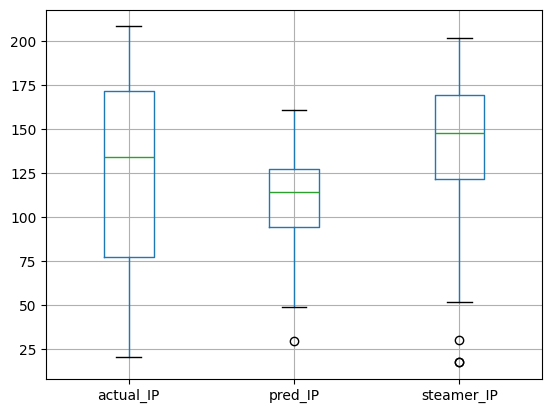

In [55]:
innings_pitched[["actual_IP", "pred_IP", "steamer_IP"]].boxplot()

# SO/IP

<Axes: >

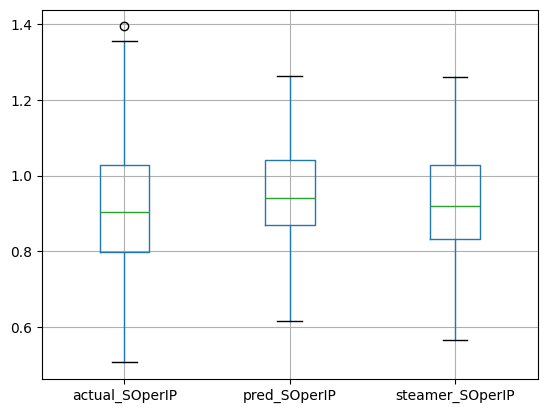

In [56]:
strikeouts = data[["actual_SOperIP", "pred_SOperIP", "steamer_SOperIP", "Name"]].copy()
strikeouts[["actual_SOperIP", "pred_SOperIP", "steamer_SOperIP"]].boxplot()

In [57]:
# Calc RMSE for players projected by both systems
strikeouts["diff_pred"] = strikeouts["pred_SOperIP"] - strikeouts["actual_SOperIP"]
strikeouts["diff_steamer"] = strikeouts["steamer_SOperIP"] - strikeouts["actual_SOperIP"]
strikeouts["diff_pred2"] = np.sqrt(np.square(strikeouts["diff_pred"]))
strikeouts["diff_steamer2"] = np.sqrt(np.square(strikeouts["diff_steamer"]))
strikeouts.sum()[["diff_pred2","diff_steamer2"]] / strikeouts.shape[0] 

diff_pred2       0.098682
diff_steamer2    0.096133
dtype: object

# BB per IP

<Axes: >

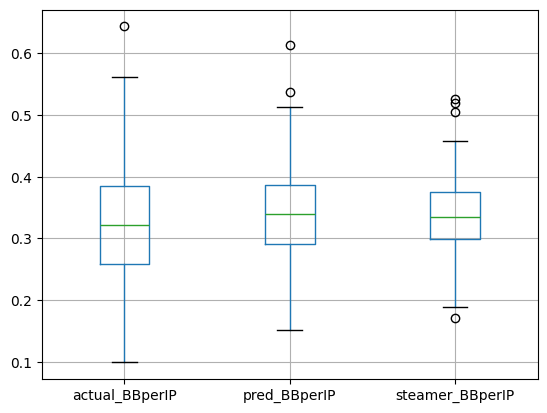

In [58]:
walks = data[["actual_BBperIP", "pred_BBperIP", "steamer_BBperIP", "Name"]].copy()
walks[["actual_BBperIP", "pred_BBperIP", "steamer_BBperIP"]].boxplot()

In [59]:
# Calc RMSE for players projected by both systems
walks["diff_pred"] = walks["pred_BBperIP"] - walks["actual_BBperIP"]
walks["diff_steamer"] = walks["steamer_BBperIP"] - walks["actual_BBperIP"]
walks["diff_pred2"] = np.sqrt(np.square(walks["diff_pred"]))
walks["diff_steamer2"] = np.sqrt(np.square(walks["diff_steamer"]))
walks.sum()[["diff_pred2","diff_steamer2"]] / walks.shape[0] 

diff_pred2       0.062073
diff_steamer2     0.06711
dtype: object

# H/IP

<Axes: >

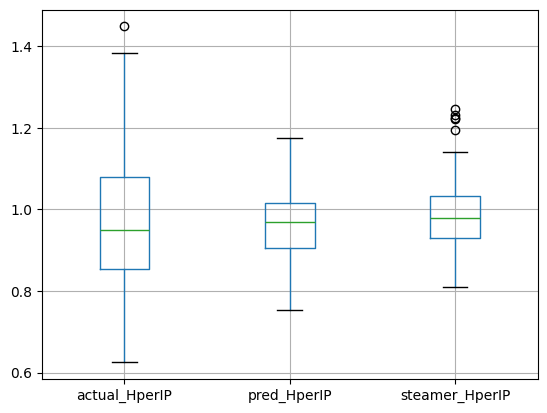

In [60]:
hits = data[["actual_HperIP", "pred_HperIP", "steamer_HperIP", "Name"]].copy()
hits[["actual_HperIP", "pred_HperIP", "steamer_HperIP"]].boxplot()

In [61]:
# Calc RMSE for players projected by both systems
hits["diff_pred"] = hits["pred_HperIP"] - hits["actual_HperIP"]
hits["diff_steamer"] = hits["steamer_HperIP"] - hits["actual_HperIP"]
hits["diff_pred2"] = np.sqrt(np.square(hits["diff_pred"]))
hits["diff_steamer2"] = np.sqrt(np.square(hits["diff_steamer"]))
hits.sum()[["diff_pred2","diff_steamer2"]] / hits.shape[0] 

diff_pred2       0.097942
diff_steamer2    0.114533
dtype: object

# HBP/IP

<Axes: >

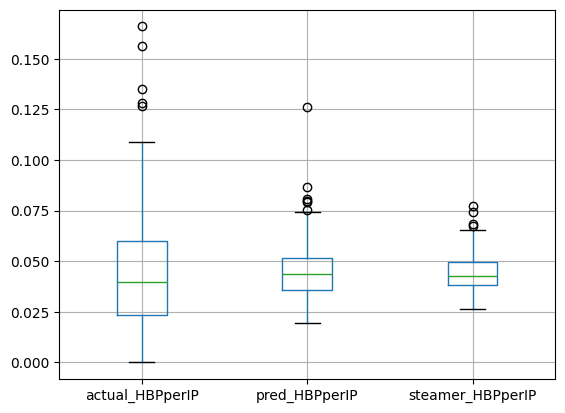

In [63]:
hbp = data[["actual_HBPperIP", "pred_HBPperIP", "steamer_HBPperIP", "Name"]].copy()
hbp[["actual_HBPperIP", "pred_HBPperIP", "steamer_HBPperIP"]].boxplot()

In [73]:
hbp[["Name", "actual_HBPperIP"]].sort_values(by="actual_HBPperIP", ascending=False)

,,Name,actual_HBPperIP
PlayerId,Season,,
26410,2024,Alek Manoah,0.165975
26378,2024,Nick Lodolo,0.156386
21844,2024,Braxton Garrett,0.135135
13781,2024,Alex Wood,0.127877
22182,2024,Hunter Greene,0.126582
...,...,...,...
20369,2024,Matt Manning,0.000000
27472,2024,Jared Shuster,0.000000
20778,2024,Cristopher Sánchez,0.000000


In [75]:
hbp[["Name", "pred_HBPperIP"]].sort_values(by="pred_HBPperIP", ascending=False)

,,Name,pred_HBPperIP
PlayerId,Season,,
26378,2024,Nick Lodolo,0.126331
26410,2024,Alek Manoah,0.086684
4676,2024,Charlie Morton,0.080593
22182,2024,Hunter Greene,0.079649
27451,2024,Alec Marsh,0.079242
...,...,...,...
29911,2024,Andrew Abbott,0.025925
14843,2024,Michael Lorenzen,0.025296
24968,2024,Reese Olson,0.023199


In [65]:
# Calc RMSE for players projected by both systems
hbp["diff_pred"] = hbp["pred_HBPperIP"] - hbp["actual_HBPperIP"]
hbp["diff_steamer"] = hbp["steamer_HBPperIP"] - hbp["actual_HBPperIP"]
hbp["diff_pred2"] = np.sqrt(np.square(hbp["diff_pred"]))
hbp["diff_steamer2"] = np.sqrt(np.square(hbp["diff_steamer"]))
hbp.sum()[["diff_pred2","diff_steamer2"]] / hbp.shape[0] 

diff_pred2       0.018038
diff_steamer2    0.020631
dtype: object

# HR/IP

<Axes: >

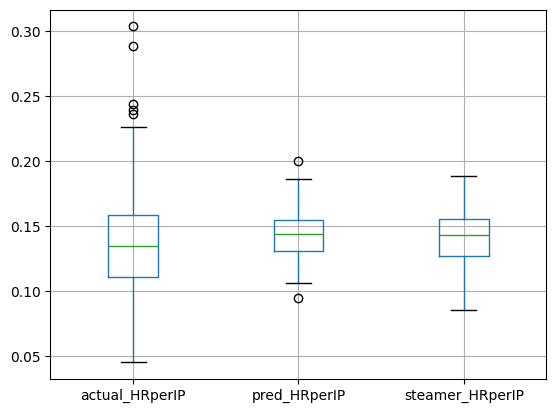

In [76]:
hr = data[["actual_HRperIP", "pred_HRperIP", "steamer_HRperIP", "Name"]].copy()
hr[["actual_HRperIP", "pred_HRperIP", "steamer_HRperIP"]].boxplot()

In [77]:
# Calc RMSE for players projected by both systems
hr["diff_pred"] = hr["pred_HRperIP"] - hr["actual_HRperIP"]
hr["diff_steamer"] = hr["steamer_HRperIP"] - hr["actual_HRperIP"]
hr["diff_pred2"] = np.sqrt(np.square(hr["diff_pred"]))
hr["diff_steamer2"] = np.sqrt(np.square(hr["diff_steamer"]))
hr.sum()[["diff_pred2","diff_steamer2"]] / hr.shape[0] 

diff_pred2        0.03053
diff_steamer2    0.032438
dtype: object